<a href="https://colab.research.google.com/github/danielgrgurevic/PortafolioDataScience/blob/main/Segmentaci%C3%B3n_de_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 3: Segmentación de clientes

## 1- Resumen ejecutivo

#### En este proyecto, se exploró y segmentó una base de datos bancaria utilizando el algoritmo K-means para agrupar a los clientes en diferentes grupos. Cada segmento se describió en función de sus características demográficas y financieras, y se propusieron estrategias de marketing específicas para abordar las necesidades de cada segmento de clientes.

### Cluster 0: Jóvenes Profesionales

Descripción: Este grupo está formado por individuos jóvenes que están construyendo sus carreras. Tienen una variedad de ocupaciones y niveles educativos. La mayoría no tiene vivienda propia ni préstamos.

Estrategia de Marketing: Dado que este grupo busca soluciones financieras adaptadas a su estilo de vida activo y en crecimiento, enfocar los mensajes en cómo los productos y servicios financieros pueden ayudarles a construir su futuro financiero. Destacar cuentas y tarjetas diseñadas para ellos, junto con asesoramiento para inversiones a largo plazo.

### Cluster 1: Mediana Edad y Estabilidad

Descripción: Personas de mediana edad forman este grupo. Tienen una variedad de ocupaciones y niveles educativos. La mayoría posee vivienda propia y muestra un equilibrio en sus saldos bancarios. Casi no tienen préstamos.

Estrategia de Marketing: Enfocarse en la estabilidad y el crecimiento a largo plazo en los mensajes. Destacar cómo tus servicios pueden ayudarles a planificar para el futuro y alcanzar metas financieras importantes. Ofrecer soluciones personalizadas, como planes de jubilación y préstamos para proyectos personales.

###Cluster 2: Propietarios de Vivienda

Descripción: Este grupo se compone principalmente de propietarios de viviendas. Tienen una variedad de ocupaciones y niveles educativos. Tienen vivienda propia y no tienen préstamos.

Estrategia de Marketing: Comunicar cómo se puede ayudar a los propietarios de viviendas a gestionar sus finanzas y mantener su hogar. Ofrecer préstamos hipotecarios con tasas competitivas y líneas de crédito para mejoras en el hogar. Destacar seguros de vivienda y la capacidad de proporcionar asistencia financiera en momentos de emergencia.

### Cluster 3: Apoyo Financiero Integral

Descripción: Este grupo abarca diversas edades y ocupaciones. La mayoría no tiene vivienda propia y todos tienen préstamos. Los saldos bancarios varían y pueden ser negativos. Los niveles educativos son promedio.

Estrategia de Marketing: Enfocar mensajes en cómo los servicios pueden brindar apoyo financiero en todas las etapas de la vida, incluso en situaciones desafiantes. Destacar préstamos personales flexibles, cuentas de ahorro para emergencias y herramientas para administrar las finanzas.

1- Resumen ejecutivo

2- Objetivos

3- Colección de datos

4- Preprocesamiento de datos

5- Visualización de datos

6- Modelación con **K-means** y validación de modelo

7-Resultados


## 2- Objetivos:
### 1- Realizar una segmentación de clientes para enfocar las campañas de marketing

## 3- Colección de datos

In [1]:
%cd /content/drive/MyDrive/Data science/Descargas kaggle/Customer_segmentation

/content/drive/MyDrive/Data science/Descargas kaggle/Customer_segmentation


In [2]:
!ls

BankCustomerData.csv  BankCustomerData.csv.zip


In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [4]:
df = pd.read_csv('BankCustomerData.csv')

In [5]:
# show data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## 4- Preprocesamiento de datos

In [6]:
df.shape

(42639, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42639 entries, 0 to 42638
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           42639 non-null  int64 
 1   job           42639 non-null  object
 2   marital       42639 non-null  object
 3   education     42639 non-null  object
 4   default       42639 non-null  object
 5   balance       42639 non-null  int64 
 6   housing       42639 non-null  object
 7   loan          42639 non-null  object
 8   contact       42639 non-null  object
 9   day           42639 non-null  int64 
 10  month         42639 non-null  object
 11  duration      42639 non-null  int64 
 12  campaign      42639 non-null  int64 
 13  pdays         42639 non-null  int64 
 14  previous      42639 non-null  int64 
 15  poutcome      42639 non-null  object
 16  term_deposit  42639 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.5+ MB


In [8]:
df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.088716,-0.009869,-0.016529,0.008296,-0.044165,-0.016279
balance,0.088716,1.000000,0.004696,0.016721,-0.013358,-0.006797,0.005194
day,-0.009869,0.004696,1.000000,-0.032557,0.165906,-0.101391,-0.048445
duration,-0.016529,0.016721,-0.032557,1.000000,-0.085640,-0.010812,-0.007730
campaign,0.008296,-0.013358,0.165906,-0.085640,1.000000,-0.079981,-0.024374
pdays,-0.044165,-0.006797,-0.101391,-0.010812,-0.079981,1.000000,0.450869
previous,-0.016279,0.005194,-0.048445,-0.007730,-0.024374,0.450869,1.000000


-> Se procede a eliminar columnas que no se hayan considerados útiles para la segmentación

In [9]:
columns_to_drop = ["default", "contact", "day", "month", "duration"]
df.drop(columns_to_drop, axis=1, inplace=True)

In [10]:
df.head(100)

,age,job,marital,education,balance,housing,loan,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,2143,yes,no,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,no,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,yes,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,no,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,no,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...
95,36,management,married,tertiary,101,yes,yes,1,-1,0,unknown,no
96,55,blue-collar,married,secondary,383,no,no,1,-1,0,unknown,no
97,60,retired,married,tertiary,81,yes,no,1,-1,0,unknown,no
98,39,technician,married,secondary,0,yes,no,1,-1,0,unknown,no


In [11]:
df.duplicated().sum()

420

In [12]:
df = df.drop_duplicates()

In [13]:
df.isnull().sum()

age             0
job             0
marital         0
education       0
balance         0
housing         0
loan            0
campaign        0
pdays           0
previous        0
poutcome        0
term_deposit    0
dtype: int64

In [14]:
df.isna().sum()

age             0
job             0
marital         0
education       0
balance         0
housing         0
loan            0
campaign        0
pdays           0
previous        0
poutcome        0
term_deposit    0
dtype: int64

In [15]:
df.describe()

,age,balance,campaign,pdays,previous
count,42219.000000,42219.000000,42219.000000,42219.000000,42219.000000
mean,40.803359,1344.983420,2.826026,34.519008,0.470073
std,10.215154,3023.583928,3.174811,92.431212,2.176956
min,18.000000,-8019.000000,1.000000,-1.000000,0.000000
25%,33.000000,71.000000,1.000000,-1.000000,0.000000
50%,39.000000,439.000000,2.000000,-1.000000,0.000000
75%,48.000000,1395.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,63.000000,536.000000,275.000000


## 5- Visualización de datos

In [16]:
age_counts = df['age'].value_counts().sort_index()

# Crear un DataFrame auxiliar para el gráfico
age_counts_df = pd.DataFrame({'Age': age_counts.index, 'Count': age_counts.values})

# Crea el gráfico de columnas con Plotly
fig = px.bar(age_counts_df, x='Age', y='Count', labels={'Age': 'Age', 'Count': 'Frequency'},
             title='Frecuencia de las edades')

# Muestra el gráfico
fig.show()

In [17]:
job_counts = df['job'].value_counts().sort_values(ascending=False)

# Crear un DataFrame auxiliar para el gráfico
job_counts_df = pd.DataFrame({'job': job_counts.index, 'Count': job_counts.values})

# Crea el gráfico de columnas con Plotly
fig = px.bar(job_counts_df, x='job', y='Count', labels={'job': 'job', 'Count': 'Frequency'},
             title='Frecuencia de los trabajos')

# Muestra el gráfico
fig.show()

In [18]:

marital_counts = df['marital'].value_counts().reset_index()
marital_counts.columns = ['marital', 'count']

# Crear el gráfico de columnas con Plotly
fig = px.bar(marital_counts, x='marital', y='count', labels={'marital': 'Marital Status', 'count': 'Frequency'},
             title='Frecuencia de estado civil')

# Muestra el gráfico
fig.show()


In [19]:
education_counts = df['education'].value_counts().reset_index()
education_counts.columns = ['education', 'count']

# Crear el gráfico de columnas con Plotly
fig = px.bar(education_counts, x='education', y='count', labels={'education': 'Education Status', 'count': 'Frequency'},
             title='Tipo de educación de clientes')

# Muestra el gráfico
fig.show()

In [20]:
balance_counts = df['balance'].value_counts()
balance_counts

0       2992
1        186
2        152
4        132
3        131
        ... 
5181       1
4439       1
5132       1
9585       1
1962       1
Name: balance, Length: 7078, dtype: int64

In [21]:
# Reemplaza 'df' con el nombre real de tu DataFrame
fig = px.histogram(df, x='balance', labels={'balance': 'Balance', 'count': 'Frequency'},
                   title='Distribución del Balance de Clientes')

# Limitar los límites del eje x
fig.update_yaxes(range=[0, 20000])

# Muestra el gráfico
fig.show()

In [22]:
import plotly.express as px

# Reemplaza 'df' con el nombre real de tu DataFrame
fig = px.histogram(df, x='balance', range_x=[0, 5000],
                   labels={'balance': 'Balance', 'count': 'Frequency'},
                   title='Distribución del Balance de Clientes')

# Muestra el gráfico
fig.show()


In [23]:
housing_counts = df['housing'].value_counts().reset_index()
housing_counts.columns = ['housing', 'count']

# Crear el gráfico de columnas con Plotly
fig = px.bar(housing_counts, x='housing', y='count', labels={'housing': 'housing Status', 'count': 'Frequency'},
             title='housing')

# Muestra el gráfico
fig.show()

In [24]:
loan_counts = df['loan'].value_counts().reset_index()
loan_counts.columns = ['loan', 'count']

# Crear el gráfico de columnas con Plotly
fig = px.bar(loan_counts, x='loan', y='count', labels={'loan': 'Loan Status', 'count': 'Frecuencia'},
             title='Préstamos de clientes')

# Personaliza el nombre del eje y
fig.update_layout(yaxis_title='Frecuencia')

# Muestra el gráfico
fig.show()

In [25]:
import plotly.express as px
import pandas as pd

# Reemplaza 'df' con el nombre real de tu DataFrame
fig = px.histogram(df, x='campaign', labels={'campaign': 'Número de Contactos', 'count': 'Frecuencia'},
                   title='Distribución del Número de Contactos en Campaña de Marketing')

# Personaliza el nombre del eje y
fig.update_layout(yaxis_title='Frecuencia')

# Muestra el gráfico
fig.show()


In [26]:
fig = px.histogram(df, x='pdays', labels={'pdays': 'Días Pasados Después del Último Contacto', 'count': 'Frecuencia'},
                   title='Distribución de Días Pasados Después del Último Contacto')

# Personaliza el nombre del eje y
fig.update_layout(yaxis_title='Frecuencia')

# Muestra el gráfico
fig.show()


In [27]:
not_contacted_count = df[df['pdays'] == 999].shape[0]

print(f"Número de clientes no contactados previamente: {not_contacted_count}")


Número de clientes no contactados previamente: 0


In [28]:
pdays_counts = df['pdays'].value_counts()
pdays_counts

-1      35662
 370       96
 364       75
 350       72
 175       67
        ...  
 382        1
 440        1
 383        1
 422        1
 218        1
Name: pdays, Length: 418, dtype: int64

todos los clientes fueron contactados en la campaña anterior

In [29]:
fig = px.histogram(df, x='previous', labels={'previous': 'Número de Contactos Previos', 'count': 'Frecuencia'},
                   title='Distribución de Número de Contactos Previos')

# Personaliza el nombre del eje y
fig.update_layout(yaxis_title='Frecuencia')

# Muestra el gráfico
fig.show()


In [30]:
previous_counts = df['previous'].value_counts()
previous_counts

0      35662
1       2381
2       1721
3        860
4        540
5        325
6        176
7        144
8         88
9         63
11        44
10        39
12        29
13        27
15        18
14        12
17        12
16        10
19         9
18         6
23         6
20         6
27         5
24         5
22         5
25         4
29         4
21         4
30         2
37         2
38         2
26         2
275        1
51         1
58         1
28         1
32         1
40         1
Name: previous, dtype: int64

La mayoría de los clientes (35,662) no fueron contactados previamente antes de la campaña actual, lo que significa que no hubo ningún contacto previo registrado para ellos en campañas anteriores.

Luego, vemos que una cantidad considerable de clientes tuvo solo un contacto previo (2381), seguido de 1721 clientes que tuvieron dos contactos previos, y así sucesivamente. A medida que el número de contactos previos aumenta, la frecuencia de los clientes que tuvieron ese número de contactos previos disminuye.

Los valores en la columna "previous" están bastante dispersos, lo que sugiere que hay una variedad de situaciones en cuanto a la cantidad de contactos previos que tuvieron los clientes.

La presencia de valores como "275", "51", "58" y otros en la columna "previous" podría indicar casos atípicos donde algunos clientes tuvieron un número significativamente alto de contactos previos.

En resumen, esta distribución muestra cuántas veces se contactó a cada cliente antes de la campaña actual. Puede ser útil para comprender cómo los contactos previos influyen en la respuesta del cliente a la campaña actual y cómo puede influir en la segmentación y las estrategias de marketing. Por ejemplo, los clientes que han tenido más contactos previos podrían requerir un enfoque diferente en comparación con aquellos que no han sido contactados previamente.







In [31]:
poutcome_counts = df['poutcome'].value_counts().reset_index()
poutcome_counts.columns = ['Outcome', 'Count']

# Crea el gráfico de barras con Plotly
fig = px.bar(poutcome_counts, x='Outcome', y='Count', labels={'Outcome': 'Resultado de la Campaña Anterior', 'Count': 'Frecuencia'},
             title='Distribución del Resultado de la Campaña Anterior')

# Personaliza el nombre del eje y
fig.update_layout(yaxis_title='Frecuencia')

# Muestra el gráfico
fig.show()


In [32]:
poutcome_counts = df['poutcome'].value_counts()
poutcome_counts

unknown    35665
failure     4271
other       1517
success      766
Name: poutcome, dtype: int64

In [33]:
term_deposit_counts = df['term_deposit'].value_counts().reset_index()
term_deposit_counts.columns = ['Term Deposit', 'Count']

# Crea el gráfico de barras con Plotly
fig = px.bar(term_deposit_counts, x='Term Deposit', y='Count', labels={'Term Deposit': 'Suscripción a Depósito a Plazo', 'Count': 'Frecuencia'},
             title='Distribución de la Suscripción a Depósito a Plazo')

# Personaliza el nombre del eje y
fig.update_layout(yaxis_title='Frecuencia')

# Muestra el gráfico
fig.show()


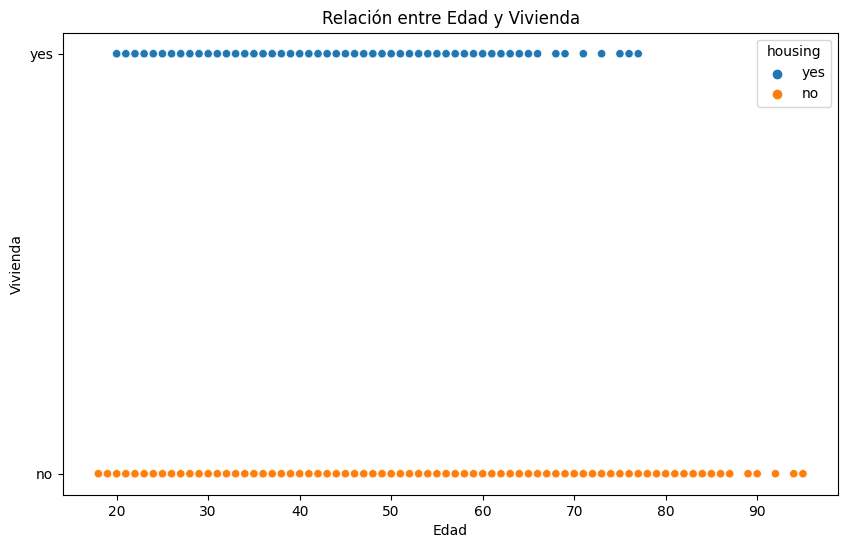

In [34]:
# Reemplaza 'df' con el nombre real de tu DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='housing', hue='housing')
plt.title('Relación entre Edad y Vivienda')
plt.xlabel('Edad')
plt.ylabel('Vivienda')
plt.show()


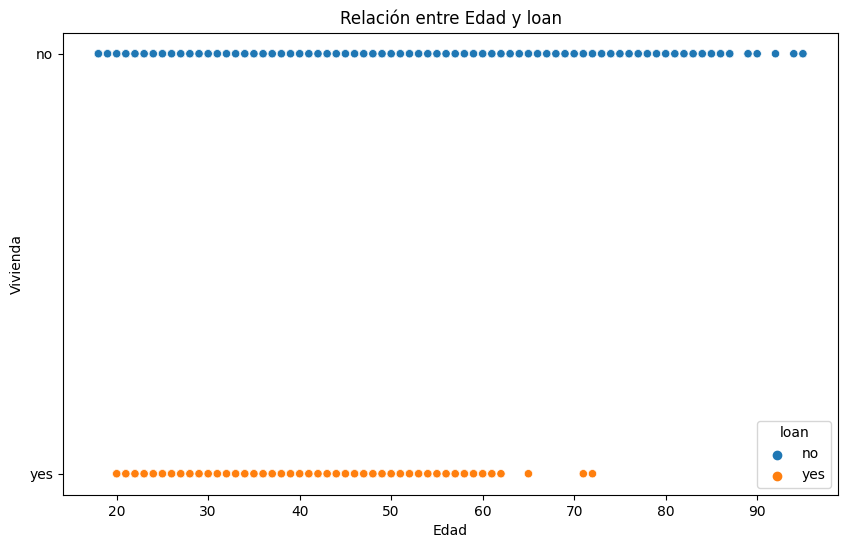

In [35]:
# Reemplaza 'df' con el nombre real de tu DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='loan', hue='loan')
plt.title('Relación entre Edad y loan')
plt.xlabel('Edad')
plt.ylabel('Vivienda')
plt.show()


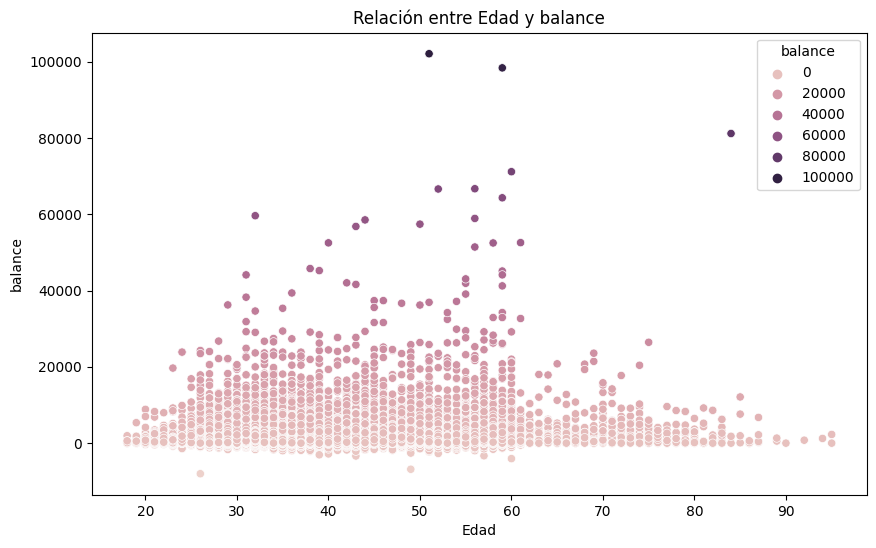

In [36]:
# Reemplaza 'df' con el nombre real de tu DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='balance', hue='balance')
plt.title('Relación entre Edad y balance')
plt.xlabel('Edad')
plt.ylabel('balance')
plt.show()

## 6- Modelamiento con K-means y validación de modelo

In [37]:
df.head()

,age,job,marital,education,balance,housing,loan,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,2143,yes,no,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,no,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,yes,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,no,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,no,1,-1,0,unknown,no


In [38]:
columns_to_drop = ["campaign", "pdays", "previous", "poutcome", "term_deposit"]
df.drop(columns_to_drop, axis=1, inplace=True)

In [39]:
df.head()

,age,job,marital,education,balance,housing,loan
0,58,management,married,tertiary,2143,yes,no
1,44,technician,single,secondary,29,yes,no
2,33,entrepreneur,married,secondary,2,yes,yes
3,47,blue-collar,married,unknown,1506,yes,no
4,33,unknown,single,unknown,1,no,no


In [40]:
df.describe()

,age,balance
count,42219.000000,42219.000000
mean,40.803359,1344.983420
std,10.215154,3023.583928
min,18.000000,-8019.000000
25%,33.000000,71.000000
50%,39.000000,439.000000
75%,48.000000,1395.500000
max,95.000000,102127.000000


In [41]:
job_counts= df['job'].value_counts()
job_counts

blue-collar      9447
management       8682
technician       7143
admin.           4789
services         4004
retired          1868
self-employed    1497
entrepreneur     1451
unemployed       1188
housemaid        1169
student           717
unknown           264
Name: job, dtype: int64

In [42]:
# Crear un diccionario de mapeo basado en la frecuencia de cada categoría
job_mapping = {
    'blue-collar': 1,
    'management': 2,
    'technician': 3,
    'admin.': 4,
    'services': 5,
    'retired': 6,
    'self-employed': 7,
    'entrepreneur': 8,
    'unemployed': 9,
    'housemaid': 10,
    'student': 11,
    'unknown': 12
}

# Aplicar la codificación ordinal a la variable 'job'
df['job'] = df['job'].map(job_mapping)

In [43]:
df.head()

,age,job,marital,education,balance,housing,loan
0,58,2,married,tertiary,2143,yes,no
1,44,3,single,secondary,29,yes,no
2,33,8,married,secondary,2,yes,yes
3,47,1,married,unknown,1506,yes,no
4,33,12,single,unknown,1,no,no


In [44]:
marital_counts= df['marital'].value_counts()
marital_counts

married     25569
single      11708
divorced     4942
Name: marital, dtype: int64

In [45]:
# Definir mapeo para la codificación ordinal de 'marital'
marital_mapping = {'single': 1, 'married': 2, 'divorced': 3}

# Aplicar la codificación ordinal a la variable 'marital'
df['marital'] = df['marital'].map(marital_mapping)

In [46]:
education_counts= df['education'].value_counts()
education_counts

secondary    21886
tertiary     12122
primary       6524
unknown       1687
Name: education, dtype: int64

In [47]:
# Definir mapeo para la codificación ordinal de 'education'
education_mapping = {'unknown': 1, 'primary': 2, 'secondary': 3, 'tertiary': 4}

# Aplicar la codificación ordinal a la variable 'education'
df['education'] = df['education'].map(education_mapping)

In [48]:
housing_counts= df['housing'].value_counts()
housing_counts

yes    24402
no     17817
Name: housing, dtype: int64

In [49]:
# Definir mapeo para la codificación ordinal de 'housing'
housing_mapping = {'no': 0, 'yes': 1}

# Aplicar la codificación ordinal a la variable 'housing'
df['housing'] = df['housing'].map(housing_mapping)

In [50]:
loan_counts= df['loan'].value_counts()
loan_counts

no     35146
yes     7073
Name: loan, dtype: int64

In [51]:
# Definir mapeo para la codificación ordinal de 'loan'
loan_mapping = {'no': 0, 'yes': 1}

# Aplicar la codificación ordinal a la variable 'housing'
df['loan'] = df['loan'].map(loan_mapping)

In [52]:
# Normalizar las columnas numéricas
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [53]:
df.head()

,age,job,marital,education,balance,housing,loan
0,58,2,2,4,2143,1,0
1,44,3,1,3,29,1,0
2,33,8,2,3,2,1,1
3,47,1,2,1,1506,1,0
4,33,12,1,1,1,0,0


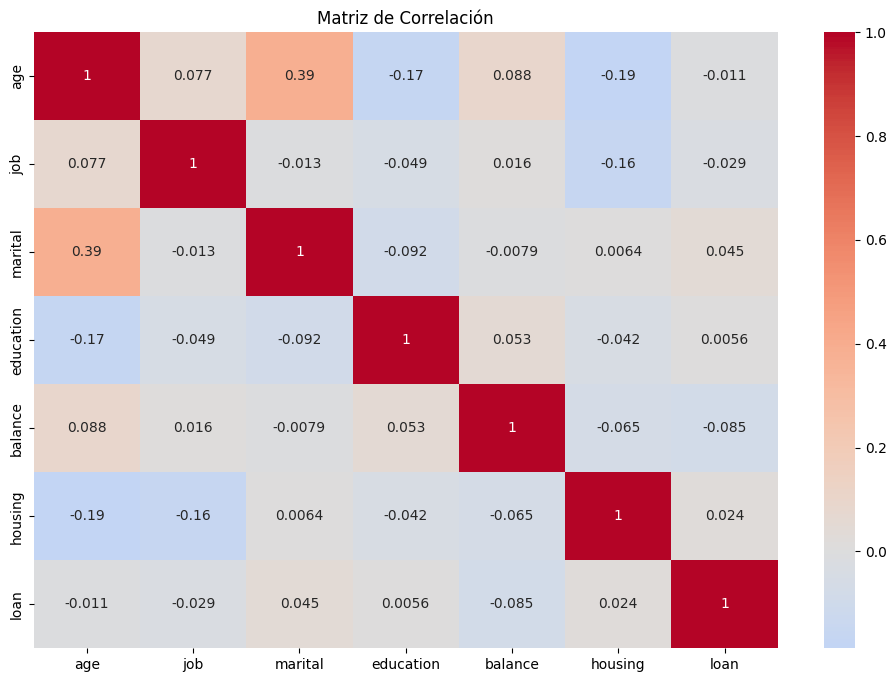

In [54]:
# Calcula la matriz de correlación
correlation_matrix = df.corr()

# Crea el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()


### Aplicar el método de codo para encontrar el número ideal de clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

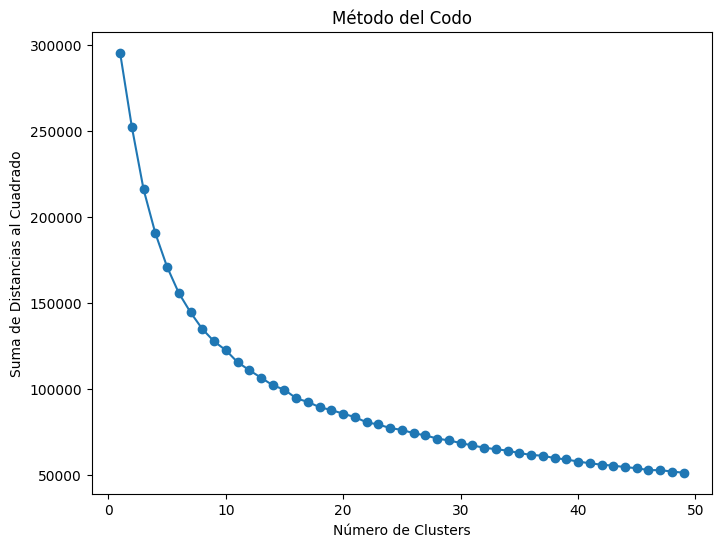

In [ ]:
# Calcular la suma de las distancias al cuadrado para diferentes valores de k
inertia = []
for k in range(1, 50):  # Prueba desde 1 hasta 10 clusters
    kmeans = KMeans(n_clusters=k,init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Graficar la suma de las distancias al cuadrado en función de k
plt.figure(figsize=(8, 6))
plt.plot(range(1, 50), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Suma de Distancias al Cuadrado')
plt.title('Método del Codo')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

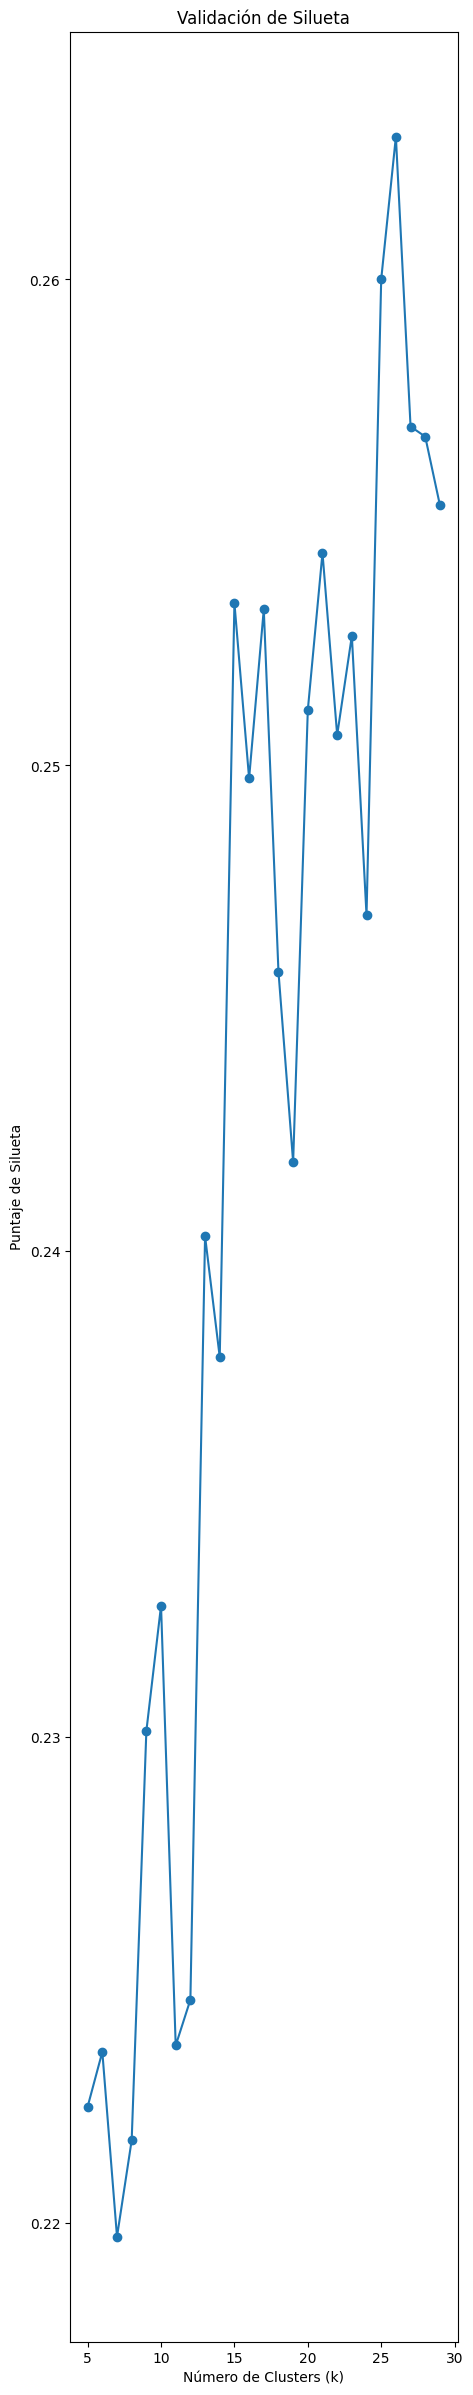

Clusters = 5, Puntaje de Silueta = 0.22240133022287045
Clusters = 6, Puntaje de Silueta = 0.2235282125187699
Clusters = 7, Puntaje de Silueta = 0.21972506315434287
Clusters = 8, Puntaje de Silueta = 0.22170914293424673
Clusters = 9, Puntaje de Silueta = 0.23012799604623171
Clusters = 10, Puntaje de Silueta = 0.23270909161030337
Clusters = 11, Puntaje de Silueta = 0.22366005495788638
Clusters = 12, Puntaje de Silueta = 0.2246018075539427
Clusters = 13, Puntaje de Silueta = 0.2403120245946768
Clusters = 14, Puntaje de Silueta = 0.2378236800152629
Clusters = 15, Puntaje de Silueta = 0.25334099047092773
Clusters = 16, Puntaje de Silueta = 0.24973250267929817
Clusters = 17, Puntaje de Silueta = 0.25321076829594985
Clusters = 18, Puntaje de Silueta = 0.24575780197265384
Clusters = 19, Puntaje de Silueta = 0.2418366241409814
Clusters = 20, Puntaje de Silueta = 0.25114031299537093
Clusters = 21, Puntaje de Silueta = 0.2543746386202642
Clusters = 22, Puntaje de Silueta = 0.2506225129867992
Clus

In [ ]:
k_range = range(5, 30)

# Lista para almacenar los puntajes de silueta
silhouette_scores = []

# Bucle para probar diferentes valores de k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficar los resultados de la validación de silueta
plt.figure(figsize=(5, 30))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Puntaje de Silueta')
plt.title('Validación de Silueta')
plt.show()

# Imprimir los puntajes de silueta para cada valor de k
for k, score in zip(k_range, silhouette_scores):
    print(f'Clusters = {k}, Puntaje de Silueta = {score}')

In [55]:
# Crear instancia de KMeans con los parámetros óptimos
kmeans = KMeans(n_clusters=4, random_state=7)

# Aplicar K-means al conjunto de datos
kmeans.fit(df_scaled)

# Obtener las etiquetas de cluster asignadas a cada punto de datos
cluster_labels = kmeans.labels_

# Agregar las etiquetas de cluster al DataFrame original
df['cluster'] = cluster_labels


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [56]:
# Ajustar el modelo K-Means para 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans_labels = kmeans.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# Calcular el coeficiente de silueta para 4 clusters
silhouette_avg = silhouette_score(df_scaled, kmeans_labels)
print(f"Coeficiente de Silueta para 4 clusters: {silhouette_avg}")

Un coeficiente de silueta de 0.2151 sugiere que la separación entre los clusters no es muy fuerte, lo que significa que los clusters podrían estar algo solapados o no estar claramente definidos.

## 7- Resultados

In [57]:
# Mostrar los resultados
df.head()

,age,job,marital,education,balance,housing,loan,cluster
0,58,2,2,4,2143,1,0,2
1,44,3,1,3,29,1,0,0
2,33,8,2,3,2,1,1,3
3,47,1,2,1,1506,1,0,2
4,33,12,1,1,1,0,0,0


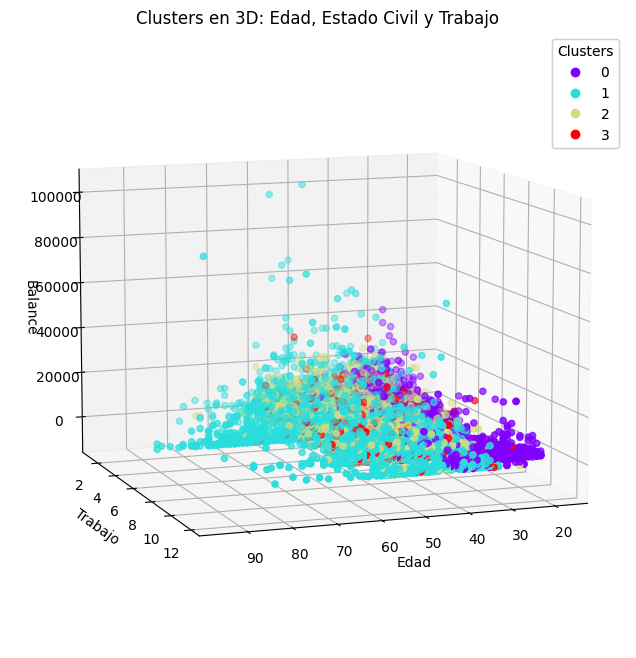

In [60]:
# Crear el gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Puedes ajustar las variables según tus necesidades
scatter = ax.scatter(df['age'], df['job'], df['balance'], c=df['cluster'], cmap='rainbow')

ax.set_xlabel('Edad')
ax.set_ylabel('Trabajo')
ax.set_zlabel('Balance')
ax.set_title('Clusters en 3D: Edad, Estado Civil y Trabajo')

# Añadir leyenda para los clústers
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Añadir la posibilidad de girar el gráfico interactivamente
ax.view_init(elev=10, azim=70)  # Ajusta los valores para obtener el ángulo deseado

plt.show()

In [58]:
df_mean=df.groupby('cluster').mean()
df_mean

,age,job,marital,education,balance,housing,loan
cluster,,,,,,,
0,32.744035,3.850251,1.010046,3.282336,1340.712013,0.588635,0.000000
1,47.088254,4.211737,2.112699,3.009526,1904.649501,0.003235,0.000449
2,41.422311,3.171758,2.148466,2.929500,1205.403027,1.000000,0.000000
3,40.538483,3.480758,1.899830,3.062252,755.405348,0.604556,1.000000


In [73]:
# Filtrar el DataFrame para obtener solo el cluster 0
cluster_0_data = df[df['cluster'] == 0]
cluster_0_data.head()

,age,job,marital,education,balance,housing,loan,cluster
1,44,3,1,3,29,1,0,0
4,33,12,1,1,1,0,0,0
9,43,3,1,3,593,1,0,0
11,29,4,1,3,390,1,0,0
26,39,2,1,4,255,1,0,0


In [74]:
# Obtener estadísticas descriptivas de las columnas para el cluster 0
cluster_0_stats = cluster_0_data[['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan']].describe()

# Mostrar las estadísticas descriptivas para el cluster 0
cluster_0_stats

,age,job,marital,education,balance,housing,loan
count,9556.000000,9556.000000,9556.000000,9556.000000,9556.000000,9556.000000,9556.0
mean,32.744035,3.850251,1.010046,3.282336,1340.712013,0.588635,0.0
std,6.085230,2.837971,0.099730,0.698077,2670.373638,0.492107,0.0
min,18.000000,1.000000,1.000000,1.000000,-1329.000000,0.000000,0.0
25%,29.000000,2.000000,1.000000,3.000000,97.000000,0.000000,0.0
50%,32.000000,3.000000,1.000000,3.000000,457.000000,1.000000,0.0
75%,36.000000,5.000000,1.000000,4.000000,1387.000000,1.000000,0.0
max,60.000000,12.000000,2.000000,4.000000,44128.000000,1.000000,0.0


In [71]:
# Variables de interés
variables = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan']

# Crear gráficos de barras para cada variable
for variable in variables:
    fig = px.histogram(cluster_0_data, x=variable, title=f'Distribución de {variable} en Cluster 0')
    fig.update_layout(xaxis_title=variable, yaxis_title='Frecuencia')
    fig.show()

In [75]:
# Filtrar el DataFrame para obtener solo el cluster 0
cluster_1_data = df[df['cluster'] == 1]
cluster_1_data.head()

,age,job,marital,education,balance,housing,loan,cluster
37,53,3,2,3,-3,0,0,1
48,55,3,3,3,0,0,0,1
66,60,6,2,4,100,0,0,1
77,55,5,3,3,91,0,0,1
81,47,5,3,3,164,0,0,1


In [76]:
# Obtener estadísticas descriptivas de las columnas para el cluster 0
cluster_1_stats = cluster_1_data[['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan']].describe()

# Mostrar las estadísticas descriptivas para el cluster 0
cluster_1_stats

,age,job,marital,education,balance,housing,loan
count,11127.000000,11127.000000,11127.000000,11127.000000,11127.000000,11127.000000,11127.000000
mean,47.088254,4.211737,2.112699,3.009526,1904.649501,0.003235,0.000449
std,10.552103,2.869959,0.419148,0.862202,4399.245873,0.056791,0.021194
min,20.000000,1.000000,1.000000,1.000000,-1968.000000,0.000000,0.000000
25%,39.000000,2.000000,2.000000,3.000000,104.000000,0.000000,0.000000
50%,47.000000,3.000000,2.000000,3.000000,598.000000,0.000000,0.000000
75%,55.000000,6.000000,2.000000,4.000000,1971.000000,0.000000,0.000000
max,95.000000,12.000000,3.000000,4.000000,102127.000000,1.000000,1.000000


In [78]:
# Variables de interés
variables = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan']

# Crear gráficos de barras para cada variable
for variable in variables:
    fig = px.histogram(cluster_1_data, x=variable, title=f'Distribución de {variable} en Cluster 1')
    fig.update_layout(xaxis_title=variable, yaxis_title='Frecuencia')
    fig.show()

In [79]:
# Filtrar el DataFrame para obtener solo el cluster 0
cluster_2_data = df[df['cluster'] == 2]

In [80]:
# Obtener estadísticas descriptivas de las columnas para el cluster 0
cluster_2_stats = cluster_2_data[['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan']].describe()

# Mostrar las estadísticas descriptivas para el cluster 0
cluster_2_stats

,age,job,marital,education,balance,housing,loan
count,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.0,14468.0
mean,41.422311,3.171758,2.148466,2.929500,1205.403027,1.0,0.0
std,8.674532,2.352208,0.394464,0.761179,2272.712750,0.0,0.0
min,21.000000,1.000000,1.000000,1.000000,-4057.000000,1.0,0.0
25%,34.000000,1.000000,2.000000,3.000000,80.000000,1.0,0.0
50%,40.000000,2.000000,2.000000,3.000000,444.000000,1.0,0.0
75%,48.000000,4.000000,2.000000,3.000000,1328.000000,1.0,0.0
max,77.000000,12.000000,3.000000,4.000000,27359.000000,1.0,0.0


In [81]:
# Variables de interés
variables = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan']

# Crear gráficos de barras para cada variable
for variable in variables:
    fig = px.histogram(cluster_2_data, x=variable, title=f'Distribución de {variable} en Cluster 2')
    fig.update_layout(xaxis_title=variable, yaxis_title='Frecuencia')
    fig.show()

In [82]:
# Filtrar el DataFrame para obtener solo el cluster 3
cluster_3_data = df[df['cluster'] == 3]

In [83]:
# Obtener estadísticas descriptivas de las columnas para el cluster 0
cluster_3_stats = cluster_3_data[['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan']].describe()

# Mostrar las estadísticas descriptivas para el cluster 0
cluster_3_stats

,age,job,marital,education,balance,housing,loan
count,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.0
mean,40.538483,3.480758,1.899830,3.062252,755.405348,0.604556,1.0
std,9.648606,2.309270,0.589167,0.675284,1746.199612,0.488980,0.0
min,20.000000,1.000000,1.000000,1.000000,-8019.000000,0.000000,1.0
25%,32.000000,2.000000,2.000000,3.000000,2.000000,0.000000,1.0
50%,39.000000,3.000000,2.000000,3.000000,255.000000,1.000000,1.0
75%,48.000000,5.000000,2.000000,3.000000,862.250000,1.000000,1.0
max,72.000000,12.000000,3.000000,4.000000,34230.000000,1.000000,1.0


In [84]:
# Variables de interés
variables = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan']

# Crear gráficos de barras para cada variable
for variable in variables:
    fig = px.histogram(cluster_3_data, x=variable, title=f'Distribución de {variable} en Cluster 3')
    fig.update_layout(xaxis_title=variable, yaxis_title='Frecuencia')
    fig.show()

Características de los Clusters 0, 1, 2 y 3:

| Característica / Cluster | Cluster 0 | Cluster 1 | Cluster 2 | Cluster 3 |
|-------------------------|-----------|-----------|-----------|-----------|
| Edad (Promedio)          | Edad promedio de 33 años. | Individuos maduros, con edades predominantes entre 39 y 55 años. | Personas en sus años intermedios, con edades en torno a 32-48 años. | Grupo con edades en torno a 32-48 años, similar al Cluster 2. |
| Ocupación (Promedio)     | Predominio de trabajadores asalariados, técnicos y posiblemente gerentes. | Mezcla de profesionales y gerentes con roles más establecidos. | Mayoría de profesionales y trabajadores asalariados. | Similar al Cluster 2, con una inclinación hacia trabajadores asalariados. |
| Estado Civil (Promedio)  | Principalmente solteros. | Mayoría de individuos casados. | Mayoría de individuos casados, similar al Cluster 1. | Mayoría casados, en línea con los Clusters 1 y 2. |
| Educación (Promedio)     | Educación universitaria predominante. | Predominio de educación universitaria. | Niveles educativos universitarios, alineados con los Clusters 1 y 3. | Educación universitaria característica, similar a los Clusters 1 y 2. |
| Saldo (Promedio)         | Saldos bajos a moderados. | Saldos en un rango moderado. | Saldos moderados, al igual que los Clusters 0 y 1. | Saldo promedio más bajo, pero típico de los Clusters 0 y 1. |
| Vivienda (Proporción)    | Mayoría sin vivienda propia. | Mayoría sin vivienda propia. | Todos tienen vivienda propia, en contraste con los Clusters 0 y 1. | Todos tienen vivienda propia, como el Cluster 2. |
| Préstamo (Proporción)    | Ninguno tiene préstamos. | Ninguno tiene préstamos. | Todos tienen préstamos, a diferencia de los Clusters 0 y 1. | Todos tienen préstamos, como el Cluster 2. |


Cluster 0
Edad (Age):

Promedio de edad: 32.74 años
Rango de edad: Desde 18 hasta 60 años
Desviación estándar: 6.09 años
Ocupación (Job):

Promedio de categoría laboral: 3.85
Rango de categoría laboral: Desde 1 hasta 12 (categorías específicas no proporcionadas)
Desviación estándar: 2.84
Estado Civil (Marital):

Promedio de estado civil: 1.01
Rango de estado civil: Desde 1 hasta 2 (categorías específicas no proporcionadas)
Desviación estándar: 0.10
Educación (Education):

Promedio de nivel educativo: 3.28
Rango de nivel educativo: Desde 1 hasta 4 (categorías específicas no proporcionadas)
Desviación estándar: 0.70
Saldo (Balance):

Promedio de saldo: 1340.71
Rango de saldo: Desde -1329 hasta 44128
Desviación estándar: 2670.37
Vivienda (Housing):

Proporción de viviendas: 58.86% no tienen vivienda propia, 41.14% tienen vivienda propia
Préstamo (Loan):

Proporción de préstamos: 0% tienen préstamos


Este cluster parece estar compuesto principalmente por individuos jóvenes con una variedad de ocupaciones. En su mayoría, no tienen vivienda propia y no tienen préstamos. Los niveles educativos varían, pero en promedio, tienen un nivel educativo razonablemente alto. El saldo bancario promedio es positivo, pero con una gran variabilidad en los saldos.

Cluster 1:

El segundo cluster presenta las siguientes características estadísticas:

Edad (Age):

Promedio de edad: 47.09 años
Rango de edad: Desde 20 hasta 95 años
Desviación estándar: 10.55 años
Ocupación (Job):

Promedio de categoría laboral: 4.21
Rango de categoría laboral: Desde 1 hasta 12 (categorías específicas no proporcionadas)
Desviación estándar: 2.87
Estado Civil (Marital):

Promedio de estado civil: 2.11
Rango de estado civil: Desde 1 hasta 3 (categorías específicas no proporcionadas)
Desviación estándar: 0.42
Educación (Education):

Promedio de nivel educativo: 3.01
Rango de nivel educativo: Desde 1 hasta 4 (categorías específicas no proporcionadas)
Desviación estándar: 0.86
Saldo (Balance):

Promedio de saldo: 1904.65
Rango de saldo: Desde -1968 hasta 102127
Desviación estándar: 4399.25
Vivienda (Housing):

Proporción de viviendas: 0.32% no tienen vivienda propia, 99.68% tienen vivienda propia
Préstamo (Loan):

Proporción de préstamos: 0.04% tienen préstamos
Este cluster parece estar compuesto por individuos maduros, con una amplia variedad de ocupaciones. La mayoría de ellos están casados, tienen educación universitaria y poseen vivienda propia. La distribución de saldos es bastante variada, con algunos valores atípicos en el lado superior. La mayoría no tiene préstamos.

Cluster 2:

El tercer cluster presenta las siguientes características estadísticas:

Edad (Age):

Promedio de edad: 41.42 años
Rango de edad: Desde 21 hasta 77 años
Desviación estándar: 8.67 años
Ocupación (Job):

Promedio de categoría laboral: 3.17
Rango de categoría laboral: Desde 1 hasta 12 (categorías específicas no proporcionadas)
Desviación estándar: 2.35
Estado Civil (Marital):

Promedio de estado civil: 2.15
Rango de estado civil: Desde 1 hasta 3 (categorías específicas no proporcionadas)
Desviación estándar: 0.39
Educación (Education):

Promedio de nivel educativo: 2.93
Rango de nivel educativo: Desde 1 hasta 4 (categorías específicas no proporcionadas)
Desviación estándar: 0.76
Saldo (Balance):

Promedio de saldo: 1205.40
Rango de saldo: Desde -4057 hasta 27359
Desviación estándar: 2272.71
Vivienda (Housing):

Proporción de viviendas: 100% tienen vivienda propia
Préstamo (Loan):

Proporción de préstamos: 0% tienen préstamos
Este cluster parece estar compuesto por individuos de mediana edad con diversas ocupaciones. La gran mayoría tiene vivienda propia y no tiene préstamos. Los saldos bancarios promedio son positivos, pero con una variabilidad significativa. Los niveles educativos son variados, pero en promedio, están en el rango medio.

Cluster 3:

El cuarto cluster muestra las siguientes características estadísticas:

Edad (Age):

Promedio de edad: 40.54 años
Rango de edad: Desde 20 hasta 72 años
Desviación estándar: 9.65 años
Ocupación (Job):

Promedio de categoría laboral: 3.48
Rango de categoría laboral: Desde 1 hasta 12 (categorías específicas no proporcionadas)
Desviación estándar: 2.31
Estado Civil (Marital):

Promedio de estado civil: 1.90
Rango de estado civil: Desde 1 hasta 3 (categorías específicas no proporcionadas)
Desviación estándar: 0.59
Educación (Education):

Promedio de nivel educativo: 3.06
Rango de nivel educativo: Desde 1 hasta 4 (categorías específicas no proporcionadas)
Desviación estándar: 0.68
Saldo (Balance):

Promedio de saldo: 755.41
Rango de saldo: Desde -8019 hasta 34230
Desviación estándar: 1746.20
Vivienda (Housing):

Proporción de viviendas: 60.46% no tienen vivienda propia, 39.54% tienen vivienda propia
Préstamo (Loan):

Proporción de préstamos: 100% tienen préstamos
Este cluster parece estar compuesto por individuos de diversas edades y ocupaciones. La mayoría no tiene vivienda propia y tiene préstamos. Los saldos bancarios varían considerablemente y pueden ser negativos. Los niveles educativos están en el rango medio.